## Project Group 11

- Teanna Urquhart

- Heidi Lantz

- Hanyu Dai

- Zhibek Dzhunusova


# Crime Rates Compared to UBC’s Surrounding Neighborhoods During the Terms

# Introduction:


People have researched crime patterns for years, and there are many theories in use regarding trends that cause spikes in crime rate. One theory is the Social Disorganization (SD) theory, which suggests that accounting for someone’s residential location is more useful in predicting criminal activity for a person than the characteristics they possess (Afon & Badiora, 2018). Another theory would be the Temperature Aggression Theory, which suggests that extreme temperatures will create discomfort in day to day life and increase aggressive motivation. These factors both are directly linked to crime and could result in an increased crime rate(Afon & Badiora, 2018). We plan to see if these theories are relevant in the crime rates surrounding the University of British Columbia’s Vancouver campus during the terms of the school year. Our research thus far has shown that spatial-temporal crime patterns are important factors to take into account in order to understand how crime rates change week by week (Haberman, etc. al, 2018). This project will attempt to either confirm or reject this theory in our area. To do this we will ask: is there a significant relationship between the rates of crimes committed in the neighbourhoods surrounding UBC and the term of the school year the crimes are committed?

The database we plan to use to answer our question is published by the Vancouver Police Department. It contains information from the past 20 years about all reported crimes, as well as detailed information about each act, from the location of the crime down to the exact time of the day it occurred. For our analysis, we will be using data from the year 2020 as a base case. We chose this year because it is recent information, but it is a past year so that no new data will be added. The neighbourhoods we have selected to analyze are Arbutus Ridge, Fairview, Kerrisdale, Kitsilano, and West Point Grey. We have chosen these because they are all neighbourhoods surrounding our University campus where students commonly live. We will use the dataset columns regarding the type of crime (“TYPE”) and the month (“MONTH”) each crime occurred to analyze our question and search for significant results. The variables that will be compared graphically and numerically are the type of crime compared to Term 1 (September-December) and Term 2 (January-April) in the UBC school year calendar. This time frame was chosen because those months of the year are when the largest population of the UBC student body is located in Vancouver, and thus is the time frame most relevant to students protecting themselves from local crimes. From the response variable, the number of specific crimes, we will use the population mean as the location parameter and difference in means as our scale parameter to assist us in finding the answer to our question. We have chosen these methods to compare the difference in means in crime per term in order to either reject or accept the null hypothesis. We are hypothesising that there will be a difference in types of crime per term at UBC in the surrounding neighbourhoods. 


## Methods

**Data to use:** 

- Year 2020

- Type of Crime

- Term 1 and 2

- Neighbourhoods - 5 closest to UBC :
1. Arbutus Ridge
2. Fairview
3. Kerrisdale
4. Kitsilano
5. West Point Grey 

We are comparing the difference in the mean number of crimes per day in each term around UBC’s campus. In this report, we began by loading our dataset and libraries needed from the web, and cleaning and tidying the data in order to select the variables and columns that we are investigating. For initial visualizations, we found the summary statistic values of the entire crime dataset, and then plotted the population distribution of crimes per day in each term to have a visual representation of this data. Right away it can be seen that term 2 has a larger number of crimes than term 1, but we do not yet know if this is statistically significant findings. From there, we will construct the hypothesis test that whether there is a difference in the mean number of crimes per day in each term. We include bootstrapping and asymptotics in our code to help us to carry out inference, and plan to use a visualization of the null distribution to determine if our hypothesis is rejected or not. Throughout the analysis we will use a seed value of 1234 in order to ensure that the code is replicable.

To begin the deeper analysis, we found the crime rates both by term and overall by dividing the number of crimes per day and the number of crimes per term. We then graphed the crime rate per day and the density of the values in a histogram, which shows that the crime rate per day distribution is bell-shaped, and has a mean of 0.00823.

The hypothesis that we will be testing is:

**$H_O$: there is no difference in the mean number of crimes per day in both terms**

**$H_A$: there is a difference in the mean number of crimes per day in both terms**

The next step in our analysis was to find asymptotics, which we did by calculating the mean and standard deviation of the entire dataset, as well as each term respectively. From there we used bootstrap sampling to resample the crime rates previously found using a sample size of 80, and used 500 replicates. This was followed by calculating the mean and standard deviation from the bootstrap sample and turning this into normal data (using dnorm). We once again utilized a histogram to visualize the sampling distribution of the bootstrapped data, and found that this method of sampling was accurate. It was an accurate choice because the bootstrapped sampling distribution is once again bell-shaped, and we can see that the mean is very close to our population mean of  0.00823. 


The use of bootstrapping as our sampling method was useful to derive the variability of the mean number of crimes per day in each term. This was beneficial for this project for many reasons, but a large one being that it would be unreasonable to attempt to work with the entire population size of crimes. Using the asymptotics allows us to find the mean number of crimes using samples from the entire population, and is beneficial for its timeliness and relatively high accuracy. We can also justify the use of bootstrapping and the asymptotic analysis in this project through the graphical visualizations shown throughout, both of which were appropriate because the data is a large enough size, and approximately bell shaped when graphed. 

The use of hypothesis testing is a method meant to evaluate the strength of the assumption we had, and when using the p-value we were able to check if there was strong evidence to reject or fail to reject the null hypothesis. We utilized this statistical test by creating a null model with 500 replicates, and visualized the data we found by finding the difference in population means between the two terms of the UBC school year. The p-value was calculated from the null model, and we got a value of 0.54, which means that we will reject our alternative hypothesis, and conclude that there is no statistically significant difference in crime rates between term 1 and term 2. 

Finally, we used a 95% confidence interval for the bootstrap sampling data. The benefit of a confidence interval is that it shows the range of values of which we can be 95% confident contains the true population mean, and we found the lower and upper bounds of our confidence interval to be -0.002177962 and 0.0002173177 which does include our bootstrap mean. Because these values are all so close to zero, this supports our conclusion that there would be no difference between the mean crimes per day, which suggests that there is no impact on crime between different terms.


In [1]:
library(tidyverse)
library(rvest)
library(dplyr)
library(stringr)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
# Reading Data
id <- "1InFZlQaj3VzFHzhh5j8WJyDf4HmcD__-" # google file ID
vpd_crime_data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
vpd_crime_data <- na.omit(vpd_crime_data)
head(vpd_crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
2,Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
3,Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
4,Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
5,Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
6,Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


In [3]:
str(vpd_crime_data)

'data.frame':	37491 obs. of  10 variables:
 $ TYPE         : chr  "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" ...
 $ YEAR         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ MONTH        : int  4 2 2 5 1 11 8 12 1 4 ...
 $ DAY          : int  19 21 11 16 1 22 17 24 1 8 ...
 $ HOUR         : int  21 1 1 22 12 0 21 23 0 21 ...
 $ MINUTE       : int  30 43 30 0 0 37 0 30 0 0 ...
 $ HUNDRED_BLOCK: chr  "29XX SLOCAN ST" "29XX VENABLES ST" "29XX VIRTUAL WAY" "29XX W 10TH AVE" ...
 $ NEIGHBOURHOOD: chr  "Renfrew-Collingwood" "Hastings-Sunrise" "Renfrew-Collingwood" "Kitsilano" ...
 $ X            : num  496397 496801 497012 487613 494642 ...
 $ Y            : num  5456123 5458182 5456474 5456729 5456214 ...
 - attr(*, "na.action")= 'omit' Named int 1081
  ..- attr(*, "names")= chr "1081"


In [4]:
summary(vpd_crime_data)

     TYPE                YEAR          MONTH             DAY       
 Length:37491       Min.   :2020   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2020   1st Qu.: 3.000   1st Qu.: 8.00  
 Mode  :character   Median :2020   Median : 6.000   Median :15.00  
                    Mean   :2020   Mean   : 6.175   Mean   :15.16  
                    3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2020   Max.   :12.000   Max.   :31.00  
      HOUR           MINUTE      HUNDRED_BLOCK      NEIGHBOURHOOD     
 Min.   : 0.00   Min.   : 0.00   Length:37491       Length:37491      
 1st Qu.: 4.00   1st Qu.: 0.00   Class :character   Class :character  
 Median :13.00   Median : 8.00   Mode  :character   Mode  :character  
 Mean   :11.46   Mean   :16.48                                        
 3rd Qu.:18.00   3rd Qu.:30.00                                        
 Max.   :23.00   Max.   :59.00                                        
       X                Y  

In [5]:
# Tidying Data
neighbourhoods <- c("Arbutus Ridge", "Fairview", "Kerrisdale", "Kitsilano", "West Point Grey") # Near UBC neighbourhoods

vpd_crime_data <- vpd_crime_data %>% 
    select(TYPE, MONTH, DAY, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD %in% neighbourhoods)

head(vpd_crime_data)

,TYPE,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<int>,<int>,<chr>
1,Theft of Vehicle,5,16,Kitsilano
2,Theft of Vehicle,2,22,Kitsilano
3,Theft of Vehicle,12,24,Kitsilano
4,Theft of Vehicle,7,27,Kitsilano
5,Theft of Vehicle,1,16,Fairview
6,Theft of Vehicle,3,21,Fairview


In [6]:
# Number of crimes by months
crimes_by_months <- vpd_crime_data %>%
    group_by(MONTH) %>%
    dplyr::summarise(count_crimes = n())

first_term_months <- c(9, 10, 11, 12)
second_term_months <- c(1, 2, 3, 4)

terms <- c("First Term", "Second Term")

# Counting the number of crimes for both terms separately
crimes_for_term_one <- crimes_by_months %>%
    filter(MONTH %in% first_term_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_term_two <- crimes_by_months %>%
    filter(MONTH %in% second_term_months) %>%
    summarize(count_crimes = sum(count_crimes))

# Binding all four data frames into one data frame to get the number of crimes in both terms
crimes_by_term <- rbind(crimes_for_term_one, crimes_for_term_two) %>%
    cbind(terms) 

# Renaming new column to terms' column
names(crimes_by_term)[names(crimes_by_term) == "count_crimes"] <- "num_of_crimes"
crimes_by_term

num_of_crimes,terms
<int>,<chr>
1669,First Term
1914,Second Term


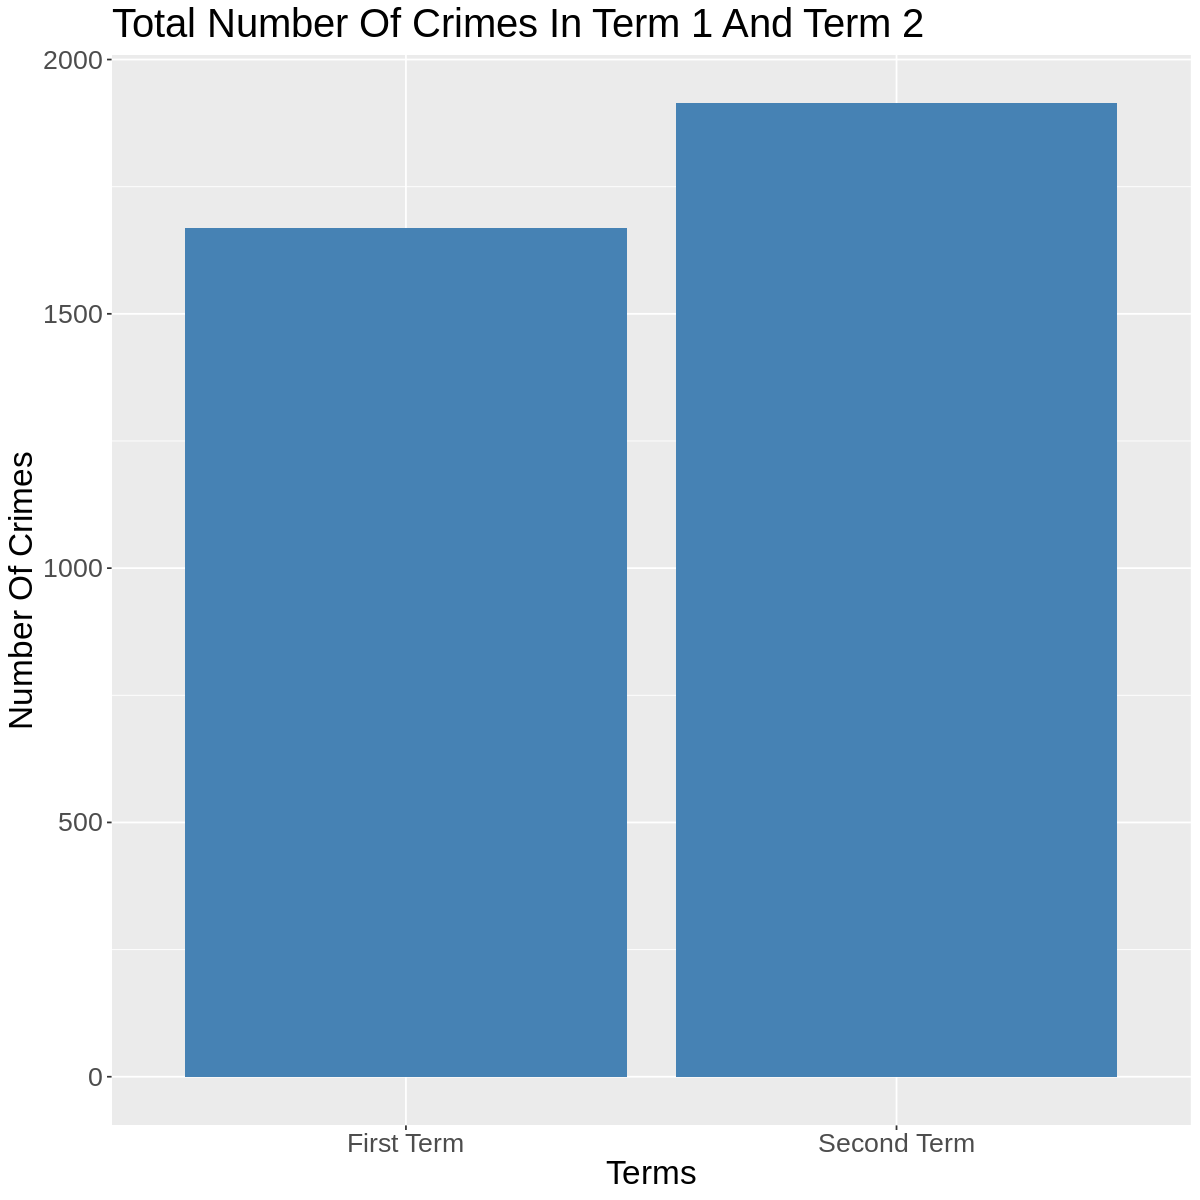

In [7]:
# Bar plot for total number of crimes in both terms
options(repr.plot.width = 10, repr.plot.height = 10)

crimes_by_term_plot <- crimes_by_term %>%
    ggplot(aes(x = terms, num_of_crimes,
               y = num_of_crimes)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(x = "Terms", y = "Number Of Crimes") +
    ggtitle("Total Number Of Crimes In Term 1 And Term 2") +
    theme(text = element_text(size = 20))
crimes_by_term_plot

### Finding the rate of crimes per day in a term
#### *(Number of crimes in  each day / Total Number of crimes in a term)*

In [8]:
# Adding a rate column of crimes for each month in both terms
set.seed(1234)
# Number of crimes in each day
crimes_in_day<- vpd_crime_data %>%
    group_by(DAY, MONTH) %>%
    dplyr::summarise(count_crimes = n())
crimes_in_day <- as.data.frame(crimes_in_day)

# Assigning "1669" for Term 1 (its total number of crimes)
crimes_rate_term_1 <- crimes_in_day %>%
    filter(MONTH %in% first_term_months) %>%
    mutate(total_num = 1669)

# Assigning "1914" for Term 1 (its total number of crimes)
crimes_rate_term_2 <- crimes_in_day %>%
    filter(MONTH %in% second_term_months) %>%
    mutate(total_num = 1914)

# Finding the number of crimes per day in a term
crimes_rate <- rbind(crimes_rate_term_1, crimes_rate_term_2) %>%
    mutate(rate = count_crimes/total_num)
head(crimes_rate)

`summarise()` has grouped output by 'DAY'. You can override using the `.groups` argument.



,DAY,MONTH,count_crimes,total_num,rate
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,9,17,1669,0.010185740
2,1,10,22,1669,0.013181546
3,1,11,13,1669,0.007789095
4,1,12,17,1669,0.010185740
5,2,9,15,1669,0.008987418
6,2,10,16,1669,0.009586579


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



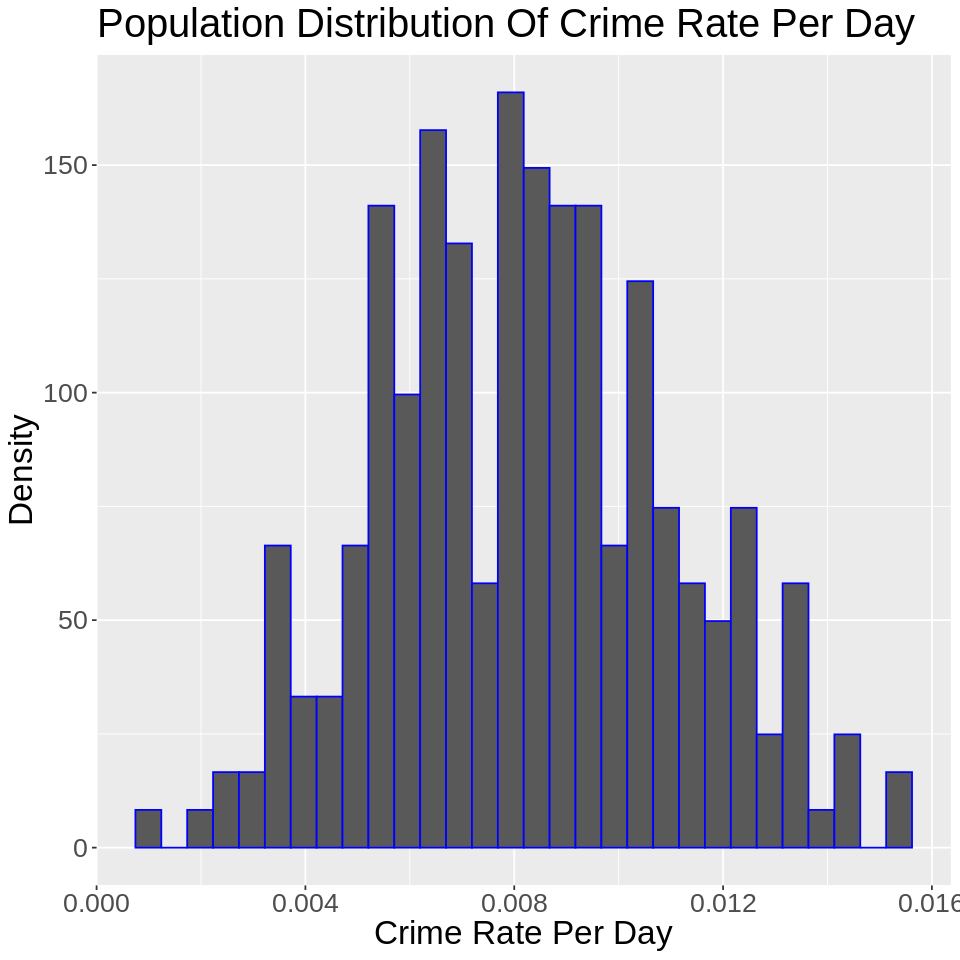

In [9]:
# Population Distribution plot
set.seed(1234)
options(repr.plot.width = 8, repr.plot.height = 8)

plot_crimes_rate <- crimes_rate %>%
    ggplot() +
    geom_histogram(aes(x = rate, y = ..density..), color = "blue") +
    theme(text = element_text(size = 20)) +
    xlab("Crime Rate Per Day") +
    ylab("Density") + 
    ggtitle("Population Distribution Of Crime Rate Per Day")
plot_crimes_rate

### Asymptotic

In [10]:
set.seed(1234)
# Finding the mean and sd for the rate of crimes for both terms together
pop_mu <- mean(crimes_rate$rate)
pop_sd <- sd(crimes_rate$rate)
pop_mu
pop_sd

# Here we are filtering our values "1669" as Term 1 and "1914" as Term 2
# we will also use them later in Hypothesis testing part

# Finidng the mean and sd for the rate of crimes for Term One
crimes_rate_term_1 <- crimes_rate %>%
    filter(total_num == "1669")

pop_mu_term_1 <- mean(crimes_rate_term_1$rate)
pop_mu_term_1

pop_sd_term_1 <- sd(crimes_rate_term_1$rate)
pop_sd_term_1


# Finidng the mean and sd for the rate of crimes for Term Two
crimes_rate_term_2 <- crimes_rate %>%
    filter(total_num == "1914")

pop_mu_term_2 <- mean(crimes_rate_term_2$rate)
pop_mu_term_2

pop_sd_term_2 <- sd(crimes_rate_term_2$rate)
pop_sd_term_2

[1] 0.008230453

[1] 0.002813334

[1] 0.008196721

[1] 0.003045667

[1] 0.008264463

[1] 0.002570193

### Bootstrapping


In [11]:
set.seed(1234)
# Bootstrapping with sample size 80
# Note: we are using "as.factor" to be able to use this df in Hypothesis Testing

one_sample <- crimes_rate %>%
    ungroup() %>%
    rep_sample_n(size = 80, reps = 1, replace = FALSE) %>%
    mutate(total_num = as.factor(total_num))

head(one_sample)

replicate,DAY,MONTH,count_crimes,total_num,rate
<int>,<int>,<int>,<int>,<fct>,<dbl>
1,7,12,8,1669,0.004793289
1,20,12,11,1669,0.006590773
1,7,4,14,1914,0.007314525
1,26,9,14,1669,0.008388256
1,29,2,12,1914,0.006269592
1,28,11,14,1669,0.008388256


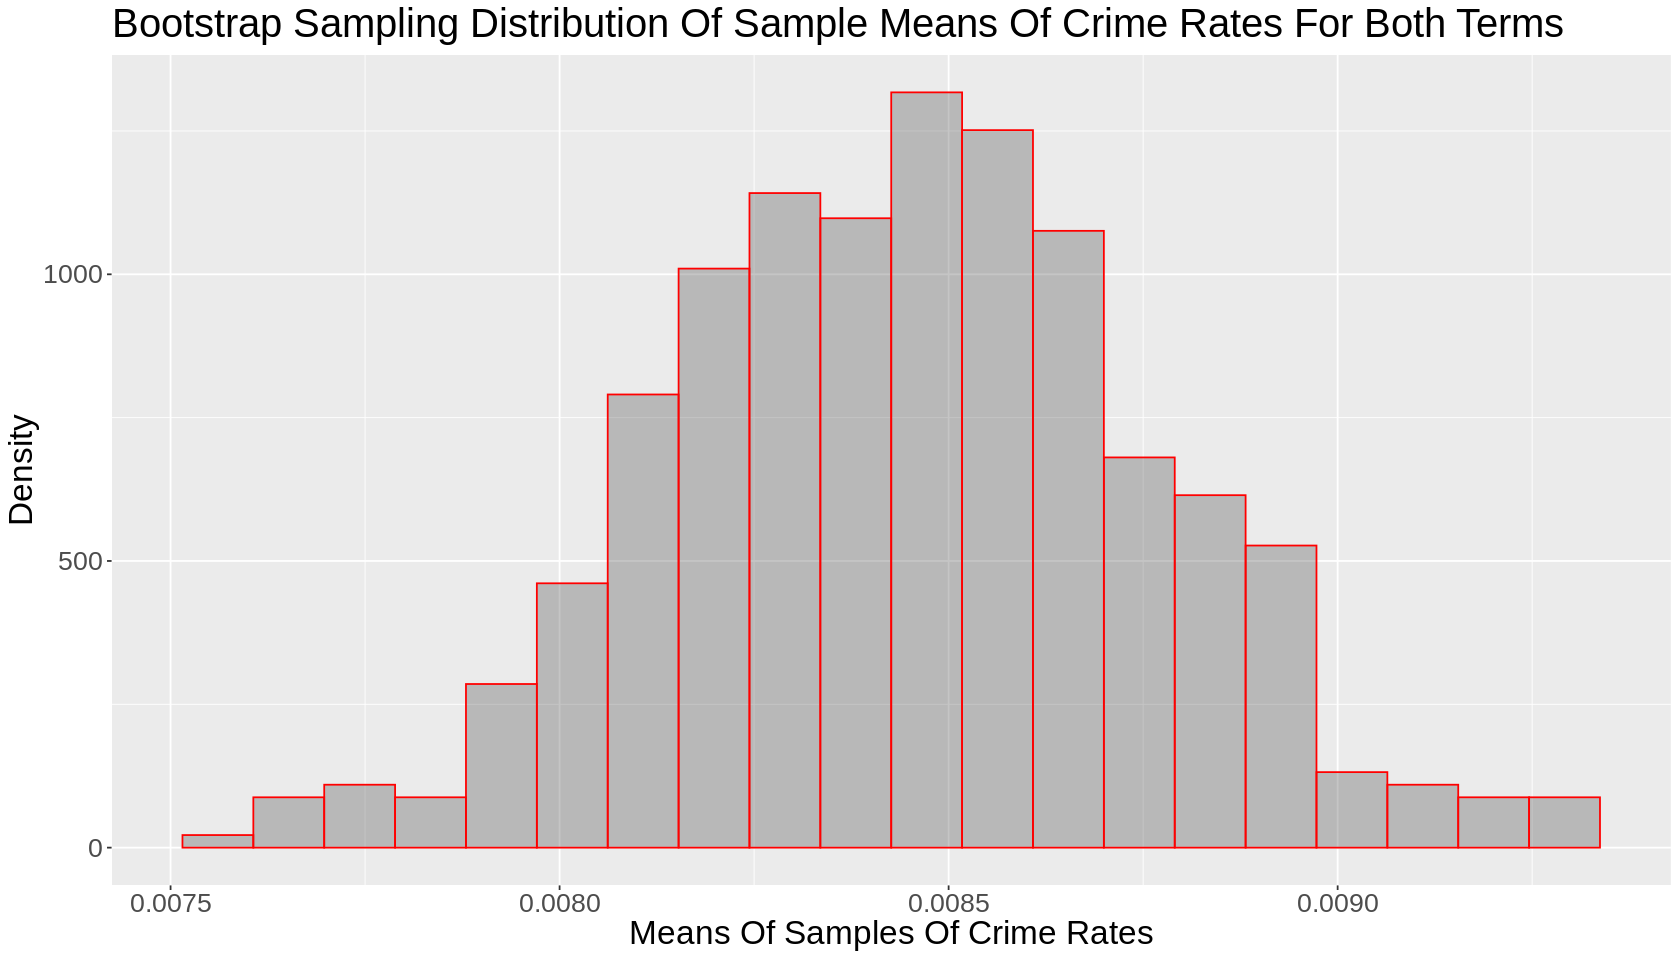

In [12]:
set.seed(1234)
# Plotting bootstrap distribution with 500 reps

sampling_dist <- one_sample %>% 
    specify(response = rate) %>% 
    generate(reps = 500, type = "bootstrap") %>% 
    calculate(stat = "mean") 

options(repr.plot.width = 14, repr.plot.height = 8)

bootstrap_500_plot <- sampling_dist %>% 
    ggplot() +
    geom_histogram(aes(stat, y = ..density..), color = "red", alpha = 0.35, bins = 20) +
    theme(text = element_text(size = 20)) + 
    xlab("Means Of Samples Of Crime Rates") +
    ylab("Density") +
    ggtitle("Bootstrap Sampling Distribution Of Sample Means Of Crime Rates For Both Terms")
bootstrap_500_plot

### Hypothesis:

$H_0 :$  there is no difference in the $\mu$ of crimes rates per day in Term 1 and Term 2

$H_A :$  there is a difference in the $\mu$ of crimes rates per day in Term 1 and Term 2

### Hypothesis Testing


In [13]:
set.seed(1234)
# Generating the Null model
# To find the difference in means of crime rates 

# Note: Here we are using values "1669" as Term 1 and "1914" as Term 2


null_model_infer <- one_sample %>%
    specify(formula = rate ~ total_num) %>%
    hypothesise(null = "independence", mu = 0.00823045267489712) %>%
    generate(reps = 500, type = "permute") %>%
    calculate(stat = "diff in means", order = c("1914", "1669"))

head(null_model_infer)

Warning message:
“Parameter values are not specified when testing that two variables are independent.”


replicate,stat
<int>,<dbl>
1,-6.848035e-04
2,1.073559e-04
3,5.758667e-04
4,9.365743e-05
5,-3.890382e-04
6,-1.162933e-03


In [14]:
set.seed(1234)
# Getting the p-value

diff_in_pop_mean <- pop_mu_term_2 - pop_mu_term_1

p_value_infer <- null_model_infer %>% 
    get_p_value(obs_stat = diff_in_pop_mean, direction = "left")
p_value_infer

p_value
<dbl>
0.54


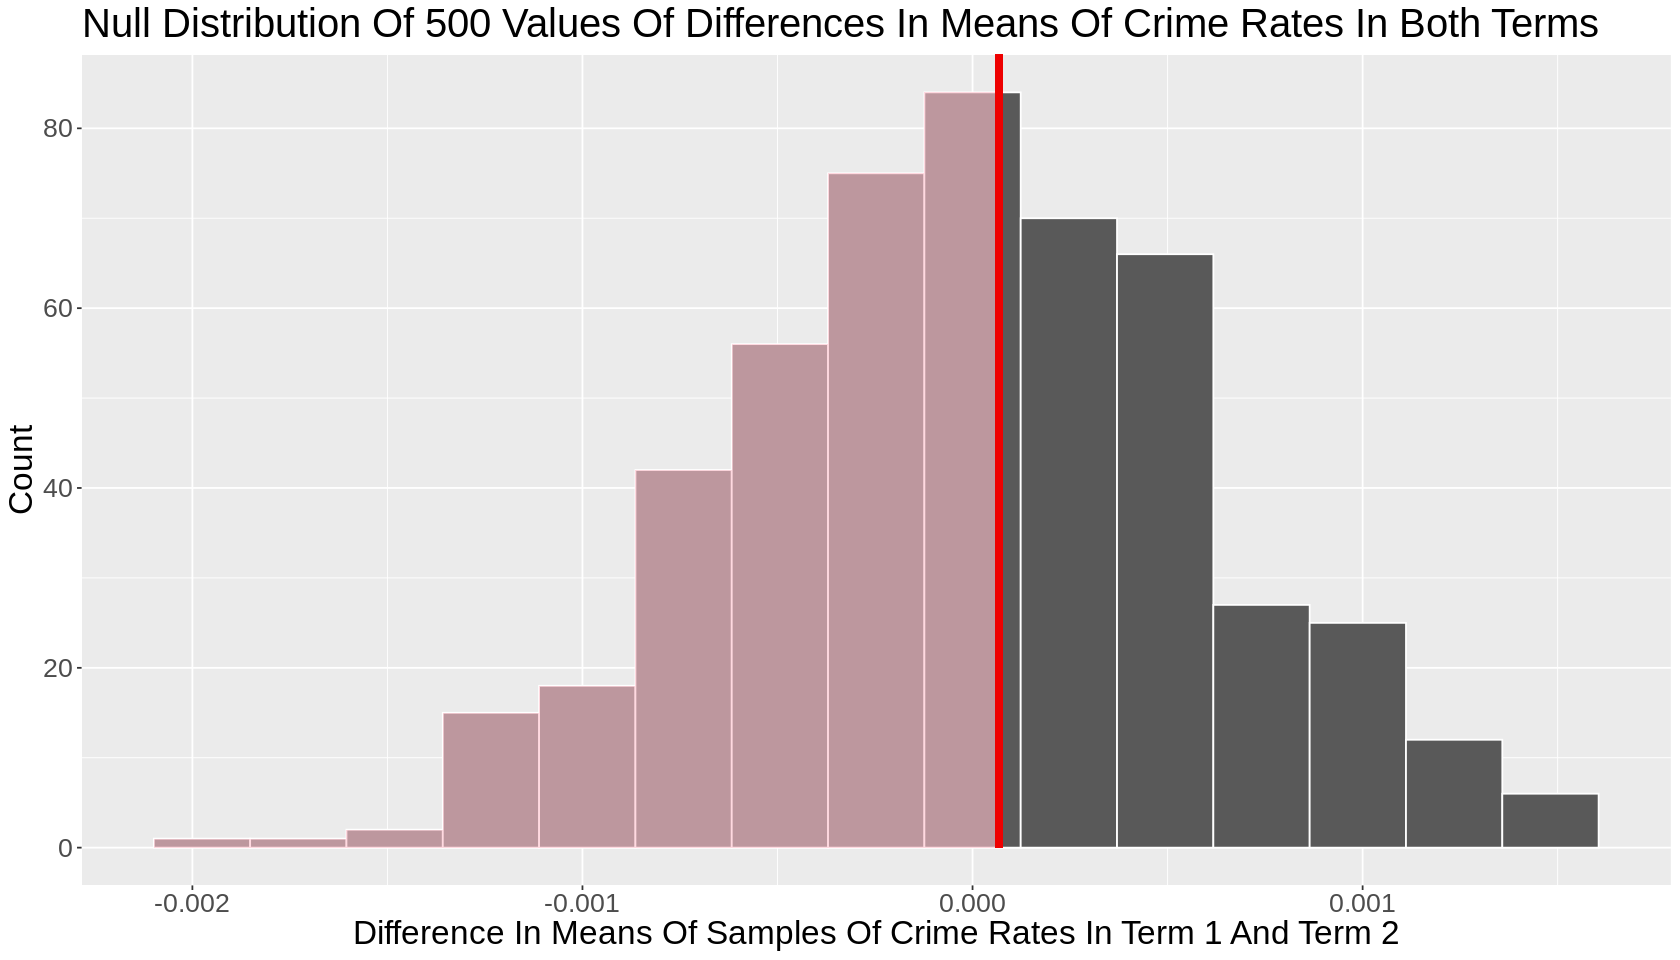

In [15]:
set.seed(1234)
# Visualizing the Null-Model

options(repr.plot.width = 14, repr.plot.height = 8)

null_model_vis_infer <- null_model_infer %>% 
    visualize() + 
    shade_p_value(obs_stat = diff_in_pop_mean, direction = "left") +
    xlab("Difference In Means Of Samples Of Crime Rates In Term 1 And Term 2") + 
    ylab("Count") +
    theme(text = element_text(size = 20)) +
    ggtitle("Null Distribution Of 500 Values Of Differences In Means Of Crime Rates In Both Terms")

null_model_vis_infer

### Confidence Intervals

In [16]:
set.seed(1234)
# Constructing Confidence Intervals

bootstrap_distribution_for_ci <- one_sample %>%
    specify(formula = rate ~ total_num) %>%
    generate(reps = 500, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("1914", "1669")) 

ci <- bootstrap_distribution_for_ci %>%
    get_confidence_interval(level = 0.95, type = "percentile")
ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.002177962,0.0002173177


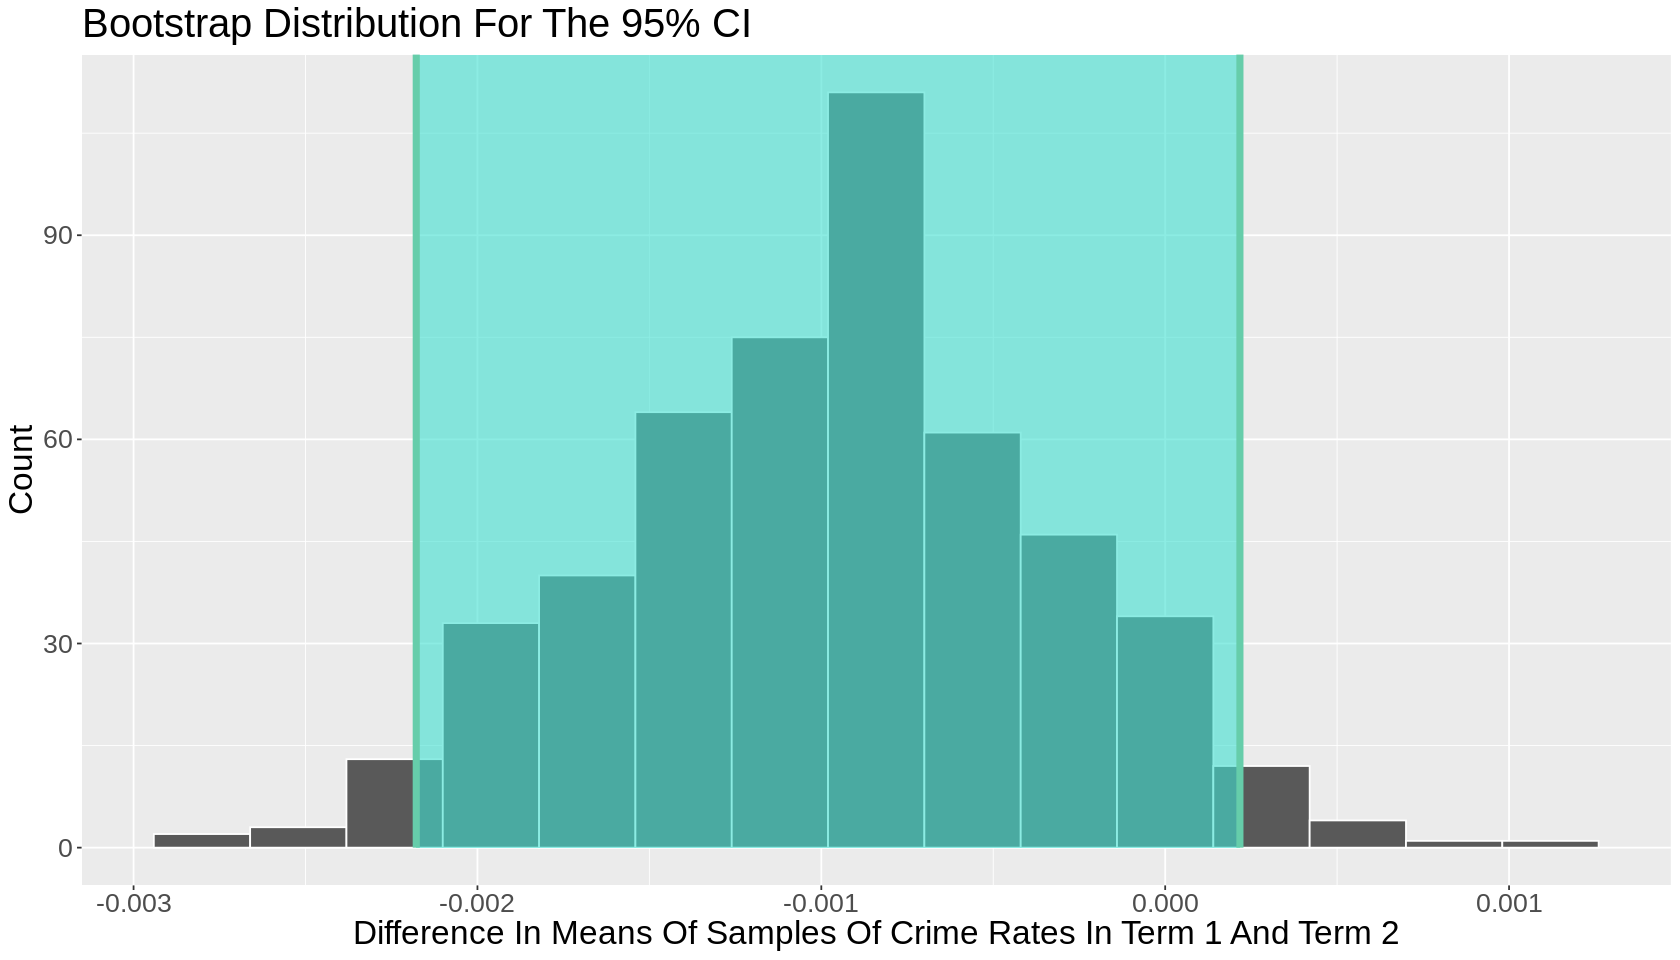

In [17]:
set.seed(1234)
visualize(bootstrap_distribution_for_ci) + 
    shade_confidence_interval(endpoints = ci) +
    theme(text = element_text(size = 20)) +
    ggtitle("Bootstrap Distribution For The 95% CI") +
    xlab("Difference In Means Of Samples Of Crime Rates In Term 1 And Term 2") +
    ylab("Count")

## Discussion

The data we found showed us that there was no difference in the ‘mean crimes per day’ values between the two terms within the neighborhoods surrounding UBC. We found this through hypothesis testing and comparing the means between the two terms. Additionally we calculated a confidence interval to further emphasize our findings that overall: the two terms crime rates were not statistically different. However, this information can still be used to advise students and other residents in the UBC area to be cautious of crime throughout the entirety of the school year. Our report provides opportunities for us to create a genuine impact on the understanding and prevention of crime for both individual citizens and the local government of Vancouver. This is due to the deep knowledge of crime distribution and rates in the local UBC neighborhoods, and we can share this knowledge to create a safer environment at our school. 

We were surprised to find that our results did not match what we had originally expected. We had predicted that there would be a difference in the rate of crime for each term, and noticeable trends in the data that would allow us to make suggestions based on the results for personal safety. Additionally, our research showed that it was likely we would be able to find significant results, and from this we believed that there would be more crime in the second term considering logical factors such as weather and the season of the year. Instead, our data showed that there was not a statistically significant difference in the rate of crime in comparison to term, which could be due to various unknown factors we did not take into account in the scope of this project.

While there was not a significant difference between the terms, the results of this project can still be used to make recommendations for lowering crime rates regardless. This is important because even without a difference in crime rates by term, we still aim to lower crime rates in general for safer and happier neighborhoods. We were able to learn about the most common types of crime in our local neighborhoods, and want to use that knowledge to recommend various solutions that will be beneficial. Some that stood out the most are asking the city to enlist more police patrol cars to prevent “Offense Against a Person” crimes. The city could also put up more warning signs to lock your cars at night to help against “Vehicle Thefts”. The police should be more wary of “Mischief” and students could be more cautious of closing their windows due to the increase of “Breaking and Entering” crimes.

These findings allow us to learn about the trends in crime and let us make decisions about how to resolve these issues. They can impact how we behave each term and help us become more knowledgeable with our surroundings and awareness. We believe that continuing to analyze this data in the future will lead to more explicit trends and further advice on how to lower crime rates. This report tells us that even though there may not be a difference in crime rates each term, there are still many steps possible to lower the crime rate in the city for safer neighborhoods around UBC.

Some future questions this study has led us to include:

- What changes could we make to lower the rate of crime for each term?

- Is this crime rate per term consistent for every city, or just neighborhoods in Vancouver near UBC?

- What other factors might affect the crime rate level like how we expected the term in the school year to?

- Would the crime rates truly be lowered with the advice we suggested in our report?


## References:

Afon, A. O., & Badiora, A. I. (2018). The dynamics of crime opportunities: Evidences from 
weather conditions and spatial pattern of residential neighborhood in Ibadan, Nigeria. 
Papers in Applied Geography, 4(1), 1-20. https://doi.org/10.1080/23754931.2017.1346520

Haberman, C. P., Sorg, E. T., & Ratcliffe, J. H. (2018). The seasons they are a changin: Testing 
for seasonal effects of potentially criminogenic places on street robbery. The Journal of 
Research in Crime and Delinquency, 55(3), 425-459. https://doi.org/10.1177/0022427818758375

Database:

Vancouver Police Department. Crime data csv all years. https://geodash.vpd.ca/opendata/#
